In [3]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

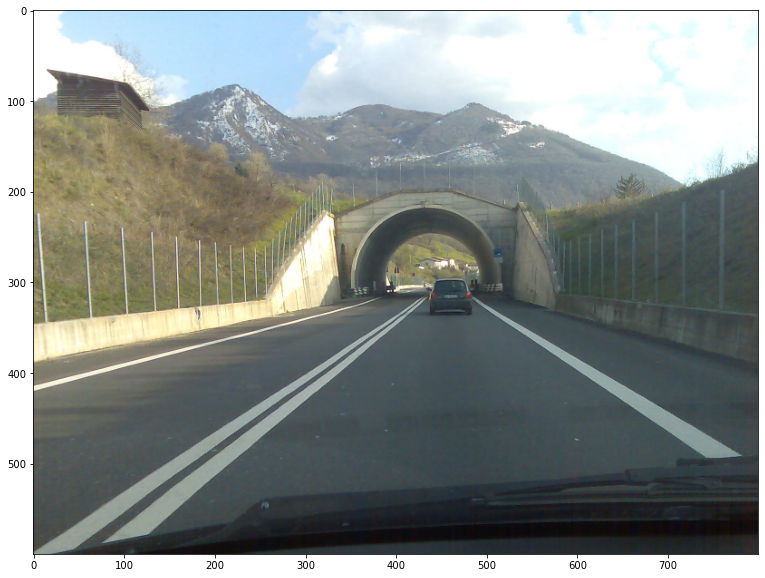

In [4]:
img = cv2.imread('Data/Road.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

(<AxesSubplot:title={'center':'Edge map'}>,
 Text(0.5, 1.0, 'Edge map'))

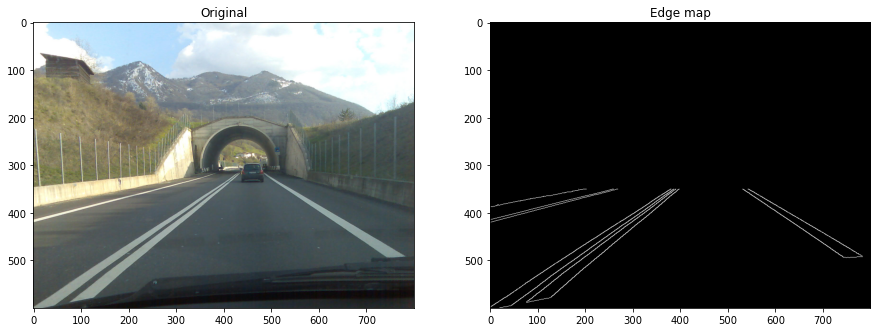

In [6]:
edges = cv2.Canny(gray, threshold1=100, threshold2=400)
edges[0:350] = 0
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge map')

(<AxesSubplot:title={'center':'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

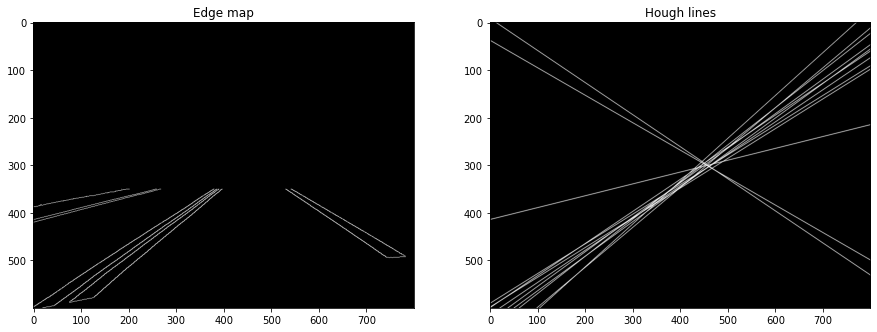

In [91]:
lines = cv2.HoughLines(edges, rho = 1, theta = 2*np.pi/180, threshold = 100)
hough = np.zeros_like(edges)


for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(hough, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(hough, cmap='gray'), plt.title('Hough lines')

(<AxesSubplot:title={'center':'Filtered lines by angle'}>,
 Text(0.5, 1.0, 'Filtered lines by angle'))

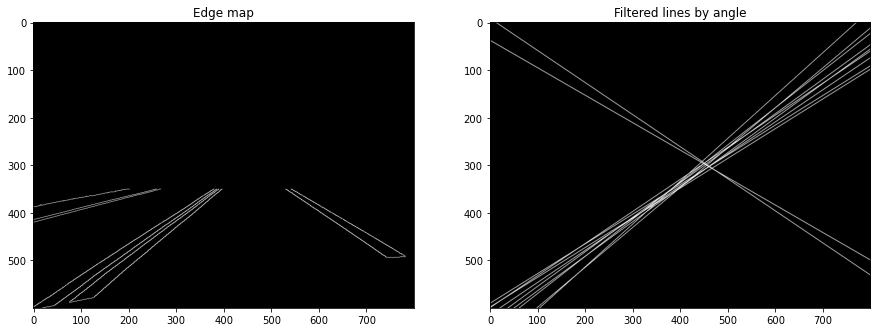

In [92]:
filtered_lines = []
filtered = np.zeros_like(edges)

for line in lines:
    theta = line[0][1]/np.pi*180
    #print(line[0])
    if theta < 70 or 110 < theta:
        filtered_lines.append(line[0])
        
for i in range(0, len(filtered_lines)):
    rho = filtered_lines[i][0]
    theta = filtered_lines[i][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(filtered, pt1, pt2, 255, 1, cv2.LINE_AA)
    
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(filtered, cmap='gray'), plt.title('Filtered lines by angle')

(<AxesSubplot:title={'center':'Result lines'}>,
 Text(0.5, 1.0, 'Result lines'))

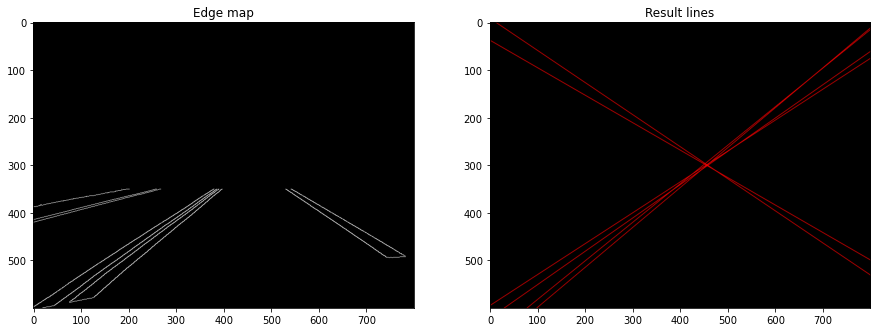

In [98]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6).fit(filtered_lines)
kmeans.cluster_centers_
data = np.zeros_like(img)

for i in range(0, len(kmeans.cluster_centers_)):
    rho = kmeans.cluster_centers_[i][0]
    theta = kmeans.cluster_centers_[i][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(data, pt1, pt2, 255, 1, cv2.LINE_AA)
    
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(data, cmap='gray'), plt.title('Result lines')

<b>1.Do you see anything strange in the final result?</b><br>
<i>Yes. Result lines don't match exactly the lines on the edge map for some mystical uncovered reasons =)<br>
Also, in theory, all perspective lines have to cross same pixel, but here instead of 'point of pespective' we've got a small area of crossing about ~5px width</i><br><br>
    
<b>2. Do you think the Hough transform resolution is important for obtaining a good result? Why?</b><br>
<i>Yes. Maybe small resolution fits when we have thick contours? But in current case algorithm draws many redundant lines if resolution is low</i><br><br>

<b>3. Do you think the Hough transform accumulator threshold is important for obtaining a good result? Why?</b><br>
<i>Sure. If we know that lines which we are trying to find on image are rather long, as in our case we can set threshold to high value for seeking only long lines</i>



<h2>Thanks for viewing!</h2> ❤️️